In [5]:
!kaggle datasets download -d dhruvildave/spotify-charts

Dataset URL: https://www.kaggle.com/datasets/dhruvildave/spotify-charts
License(s): ODbL-1.0
spotify-charts.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
!unzip spotify-charts.zip

Archive:  spotify-charts.zip
  inflating: charts.csv              


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



df = pd.read_csv('charts.csv')
df.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26173514 entries, 0 to 26173513
Data columns (total 9 columns):
 #   Column   Dtype  
---  ------   -----  
 0   title    object 
 1   rank     int64  
 2   date     object 
 3   artist   object 
 4   url      object 
 5   region   object 
 6   chart    object 
 7   trend    object 
 8   streams  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 1.8+ GB


In [9]:
df.describe()

,rank,streams
count,2.617351e+07,2.032190e+07
mean,8.092314e+01,5.526131e+04
std,5.918601e+01,2.095872e+05
min,1.000000e+00,1.001000e+03
25%,2.900000e+01,3.546000e+03
50%,6.700000e+01,9.565000e+03
75%,1.310000e+02,3.540900e+04
max,2.000000e+02,1.974970e+07


In [10]:
df.isnull().sum()

,0
title,11
rank,0
date,0
artist,18
url,0
region,0
chart,0
trend,0
streams,5851610


In [11]:
#order by greatest count
df['region'].value_counts()

# df['region'].groupby(df['region']).count()

,count
region,
Argentina,455308
United States,455057
Austria,454593
Brazil,454439
Australia,453103
...,...
Ukraine,127544
Russia,126837
Luxembourg,98053


In [12]:
#region unique values
df['region'].unique()

array(['Argentina', 'Australia', 'Brazil', 'Austria', 'Belgium',
       'Colombia', 'Bolivia', 'Denmark', 'Bulgaria', 'Canada', 'Chile',
       'Costa Rica', 'Czech Republic', 'Finland', 'Dominican Republic',
       'Ecuador', 'El Salvador', 'Estonia', 'France', 'Germany', 'Global',
       'Greece', 'Guatemala', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'Indonesia', 'Ireland', 'Italy', 'Japan', 'Latvia',
       'Lithuania', 'Malaysia', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Panama', 'Paraguay', 'Peru',
       'Philippines', 'Poland', 'Portugal', 'Singapore', 'Spain',
       'Slovakia', 'Sweden', 'Taiwan', 'Switzerland', 'Turkey',
       'United Kingdom', 'United States', 'Uruguay', 'Thailand',
       'Andorra', 'Romania', 'Vietnam', 'Egypt', 'India', 'Israel',
       'Morocco', 'Saudi Arabia', 'South Africa', 'United Arab Emirates',
       'Russia', 'Ukraine', 'South Korea'], dtype=object)

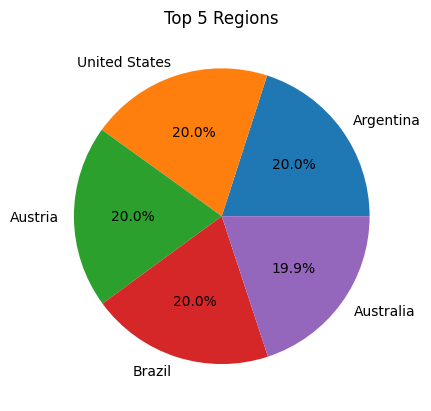

In [13]:
#pie chart of top 5 regions
df['region'].value_counts().head(5).plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Regions')
plt.ylabel('')
plt.show()

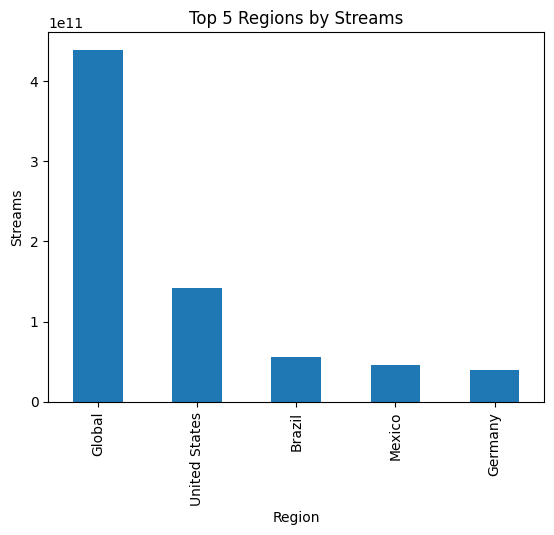

In [14]:
#top 5 regions of most streams
df.groupby('region')['streams'].sum().sort_values(ascending=False).head(5).plot(kind='bar')
plt.title('Top 5 Regions by Streams')
plt.xlabel('Region')
plt.ylabel('Streams')
plt.show()

In [15]:
#dataframe of argentina records only
df_argentina = df[df['region'] == 'Argentina']
df_argentina.head()

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [16]:
df_argentina.shape

(455308, 9)

In [17]:
df_argentina.info()

<class 'pandas.core.frame.DataFrame'>
Index: 455308 entries, 0 to 26170120
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   title    455308 non-null  object 
 1   rank     455308 non-null  int64  
 2   date     455308 non-null  object 
 3   artist   455308 non-null  object 
 4   url      455308 non-null  object 
 5   region   455308 non-null  object 
 6   chart    455308 non-null  object 
 7   trend    455308 non-null  object 
 8   streams  364385 non-null  float64
dtypes: float64(1), int64(1), object(7)
memory usage: 34.7+ MB


In [18]:
#convert date type
df_argentina['date'] = pd.to_datetime(df_argentina['date'])

#convert float to int
# df_argentina['streams'] = df_argentina['streams'].astype(int)

#drop nulls
df_argentina = df_argentina.dropna()
df_argentina.info()

<ipython-input-18-0beb4098e36e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_argentina['date'] = pd.to_datetime(df_argentina['date'])


<class 'pandas.core.frame.DataFrame'>
Index: 364385 entries, 0 to 25180359
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   title    364385 non-null  object        
 1   rank     364385 non-null  int64         
 2   date     364385 non-null  datetime64[ns]
 3   artist   364385 non-null  object        
 4   url      364385 non-null  object        
 5   region   364385 non-null  object        
 6   chart    364385 non-null  object        
 7   trend    364385 non-null  object        
 8   streams  364385 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 27.8+ MB


In [19]:
#rearrange the index
df_argentina = df_argentina.reset_index(drop=True)
df_argentina.tail()

,title,rank,date,artist,url,region,chart,trend,streams
364380,"Let Me Go (with Alesso, Florida Georgia Line &...",196,2018-01-31,Hailee Steinfeld,https://open.spotify.com/track/5AEtlRudpgdT5Ft...,Argentina,top200,MOVE_UP,15990.0
364381,Despacito - Remix,197,2018-01-31,"Luis Fonsi, Daddy Yankee, Justin Bieber",https://open.spotify.com/track/5CtI0qwDJkDQGwX...,Argentina,top200,MOVE_DOWN,15962.0
364382,"Amor, Amor, Amor (feat. Wisin)",198,2018-01-31,Jennifer Lopez,https://open.spotify.com/track/7h9sdbDEBfkWSmO...,Argentina,top200,MOVE_DOWN,15927.0
364383,There's Nothing Holdin' Me Back,199,2018-01-31,Shawn Mendes,https://open.spotify.com/track/79cuOz3SPQTuFrp...,Argentina,top200,NEW_ENTRY,15858.0
364384,We Don't Talk Anymore (feat. Selena Gomez),200,2018-01-31,Charlie Puth,https://open.spotify.com/track/68EMU2RD1ECNeOe...,Argentina,top200,MOVE_DOWN,15832.0


In [20]:
df_argentina['trend'].unique()

array(['SAME_POSITION', 'MOVE_UP', 'MOVE_DOWN', 'NEW_ENTRY'], dtype=object)

In [21]:
df_argentina['trend'].value_counts()

,count
trend,
MOVE_DOWN,156618
MOVE_UP,135731
SAME_POSITION,53730
NEW_ENTRY,18306


In [22]:
df_argentina['chart'].value_counts()


,count
chart,
top200,364385


In [23]:
df_argentina['artist'].unique()

array(['Shakira', 'Ricky Martin', 'CNCO', ...,
       'Sech, Dalex, Rich Music LTD, Justin Quiles, Arcangel, De La Ghetto, Lenny Tavárez, Dímelo Flow',
       'The Cranberries', 'DJ Tao, Perro Primo'], dtype=object)

In [24]:
df_argentina['artist'].value_counts().head(30)

,count
artist,
Maluma,5673
Paulo Londra,5630
Ed Sheeran,5397
Bad Bunny,4978
Ozuna,4525
Callejeros,3282
Dua Lipa,3280
J Balvin,3116
WOS,3074


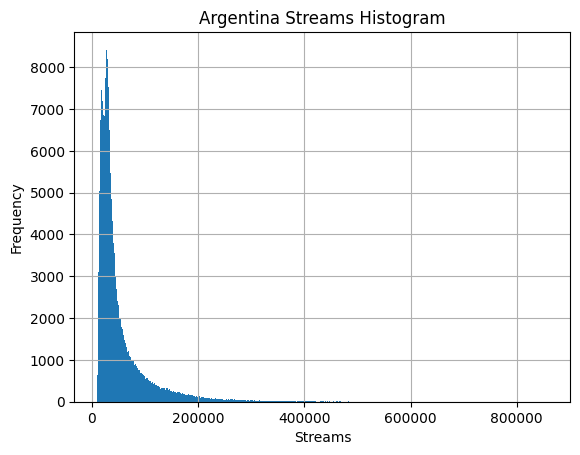

In [25]:
#hsitogram
df_argentina['streams'].hist(bins=1000)
plt.title('Argentina Streams Histogram')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.show()

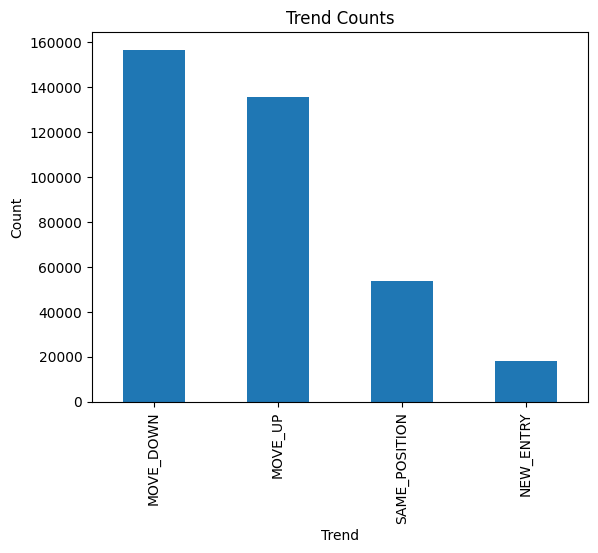

In [26]:
#bar chart of trends
df_argentina['trend'].value_counts().plot(kind='bar')
plt.title('Trend Counts')
plt.xlabel('Trend')
plt.ylabel('Count')
plt.show()


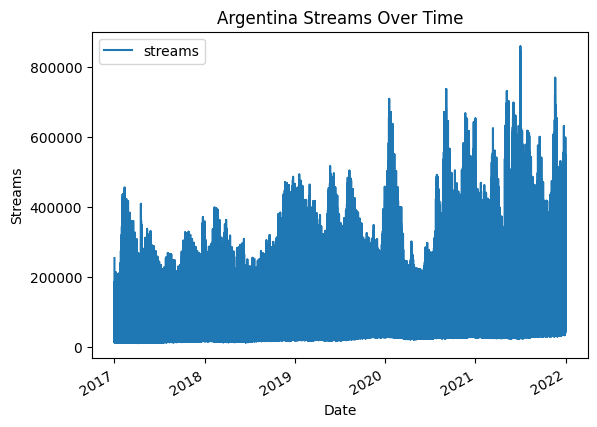

In [27]:
#line plot of streams
df_argentina.plot(x='date', y='streams', kind='line')
plt.title('Argentina Streams Over Time')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.show()


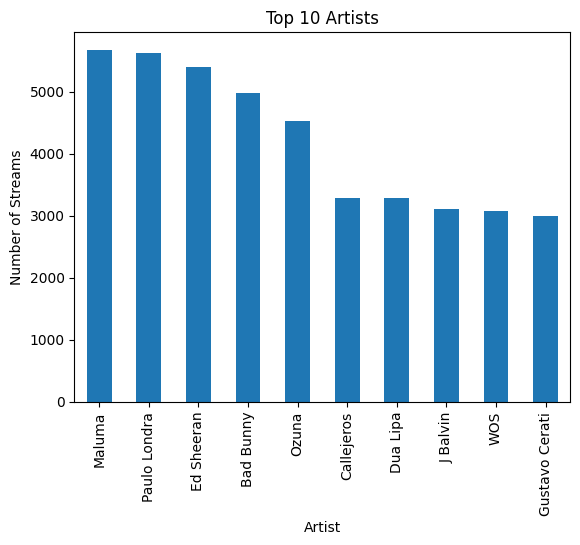

In [28]:
#top 10 artists
df_argentina['artist'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Number of Streams')
plt.show()

In [29]:
#add year column
df_argentina['year'] = df_argentina['date'].dt.year
df_argentina.head()

,title,rank,date,artist,url,region,chart,trend,streams,year
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0,2017
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0,2017
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0,2017
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0,2017


In [30]:
df_argentina['year'].value_counts()

,count
year,
2020,73200
2018,73000
2019,73000
2021,72799
2017,72386


In [31]:
#grop by year and streams
df_argentina.groupby('year')['streams'].sum()

,streams
year,
2017,2.687571e+09
2018,3.154620e+09
2019,3.961321e+09
2020,4.382741e+09
2021,5.347560e+09


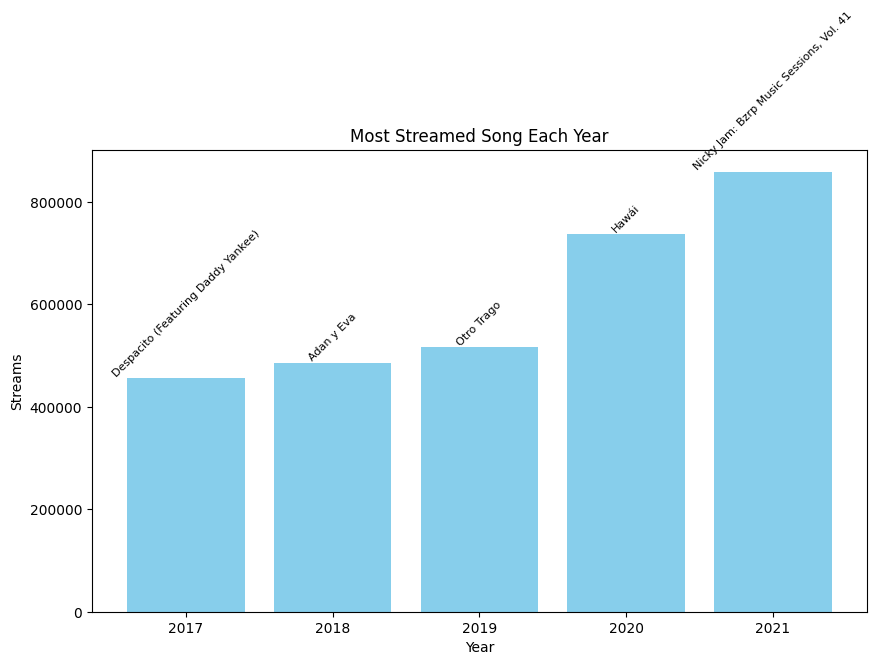

In [32]:
max_streams_per_year = df_argentina.loc[df_argentina.groupby('year')['streams'].idxmax()]

# Plot the results
plt.figure(figsize=(10, 6))
bars = plt.bar(max_streams_per_year['year'], max_streams_per_year['streams'], color='skyblue')

# Annotate bars with the song titles
for bar, title in zip(bars, max_streams_per_year['title']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 500, title, ha='center', va='bottom', fontsize=8, rotation=45)

plt.xticks(max_streams_per_year['year'])
plt.xlabel('Year')
plt.ylabel('Streams')
plt.title('Most Streamed Song Each Year')
plt.show()

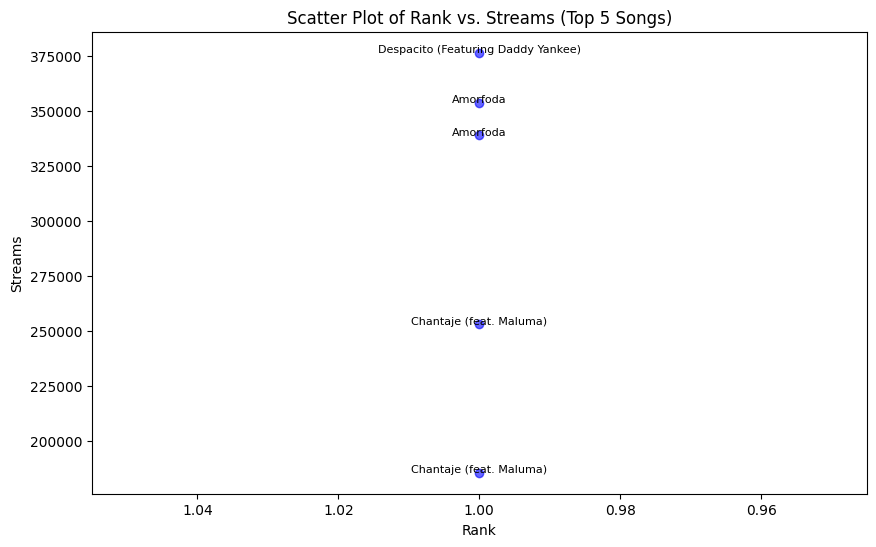

In [33]:
# Filter to include only the top 5 songs by rank
top_5_songs = df_argentina.nsmallest(5, 'rank')

plt.figure(figsize=(10, 6))
plt.scatter(top_5_songs['rank'], top_5_songs['streams'], color='blue', alpha=0.6)

# Adding labels and title
plt.xlabel('Rank')
plt.ylabel('Streams')
plt.title('Scatter Plot of Rank vs. Streams (Top 5 Songs)')

# Annotate each point with the song title
for i in range(len(top_5_songs)):
    plt.text(top_5_songs['rank'].iloc[i], top_5_songs['streams'].iloc[i] + 20, top_5_songs['title'].iloc[i], fontsize=8, ha='center')

plt.gca().invert_xaxis()  # Invert x-axis to reflect higher ranks on the left
plt.show()


In [34]:
#songs of rank 1
df_argentina[df_argentina['rank'] == 1]

,title,rank,date,artist,url,region,chart,trend,streams,year
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0,2017
202,Chantaje (feat. Maluma),1,2017-01-02,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,185399.0,2017
400,Amorfoda,1,2018-03-01,Bad Bunny,https://open.spotify.com/track/3ITvHA9zhZZdBJs...,Argentina,top200,SAME_POSITION,339036.0,2018
600,Amorfoda,1,2018-03-02,Bad Bunny,https://open.spotify.com/track/3ITvHA9zhZZdBJs...,Argentina,top200,SAME_POSITION,353883.0,2018
800,Despacito (Featuring Daddy Yankee),1,2017-02-01,Luis Fonsi,https://open.spotify.com/track/4aWmUDTfIPGksMN...,Argentina,top200,SAME_POSITION,376615.0,2017
...,...,...,...,...,...,...,...,...,...,...
363385,Salimo de Noche,1,2021-10-30,"Tiago PZK, Trueno",https://open.spotify.com/track/6P096SaOzrgGxs8...,Argentina,top200,SAME_POSITION,433889.0,2021
363585,Bella,1,2018-01-29,Wolfine,https://open.spotify.com/track/4R55IUi2x7S5ek2...,Argentina,top200,SAME_POSITION,263843.0,2018
363785,Salimo de Noche,1,2021-10-31,"Tiago PZK, Trueno",https://open.spotify.com/track/6P096SaOzrgGxs8...,Argentina,top200,SAME_POSITION,342556.0,2021
363985,Bella,1,2018-01-30,Wolfine,https://open.spotify.com/track/4R55IUi2x7S5ek2...,Argentina,top200,SAME_POSITION,269629.0,2018


In [35]:
#top monthly streams each year
df_argentina['month'] = df_argentina['date'].dt.month

df_argentina['month_txt'] = df_argentina['date'].dt.month_name().str.slice(stop=3)

df_argentina.groupby(['year', 'month' , 'month_txt'])['streams'].sum().sort_values(ascending=False).head(12)

year  month  month_txt
2021  8      Aug          494268623.0
2020  12     Dec          489535075.0
2021  12     Dec          489494085.0
      7      Jul          484320660.0
      10     Oct          480493735.0
      1      Jan          467944296.0
      11     Nov          467039637.0
      9      Sep          463463981.0
2020  11     Nov          427785247.0
2021  6      Jun          419761554.0
2020  10     Oct          411272645.0
2021  3      Mar          409898907.0
Name: streams, dtype: float64

<Axes: xlabel='year,month,month_txt'>

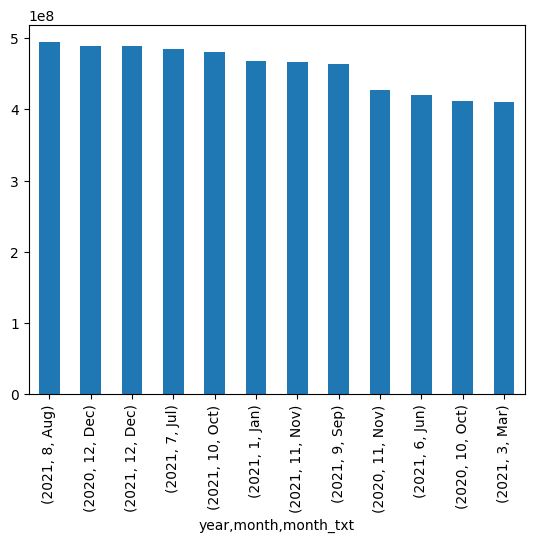

In [36]:
#bar plot of most monthly streams each year
df_argentina.groupby(['year', 'month' , 'month_txt'])['streams'].sum().sort_values(ascending=False).head(12).plot(kind='bar')

In [37]:
#install streamlit
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.1 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [38]:
!npm install localtunnel


added 22 packages, and audited 23 packages in 1s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues, run:
  npm audit fix

Run `npm audit` for details.


In [39]:
import urllib
print("Password/Enpoint IP for localtunnel is:",urllib.request.urlopen('https://ipv4.icanhazip.com').read().decode('utf8').strip("\n"))

Password/Enpoint IP for localtunnel is: 34.19.24.223


In [40]:
!streamlit hello &>/content/logs.txt & npx localtunnel --port 8501

your url is: https://red-chefs-run.loca.lt
^C


In [41]:
#convert data to csv
df_argentina.to_csv('data.csv', index=False)


In [42]:
import streamlit as st
import pandas as pd
import io

# Load the data
df = pd.read_csv('data.csv')

# Title of the dashboard
st.title('Spotify Dashboard')

# Sidebar for selecting what to visualize
st.sidebar.title('Visualization Selector')
visualization = st.sidebar.radio('Select Visualization:',
                                 ('DataFrame', 'Summary', 'Column Plot'))

# Display the selected visualization
if visualization == 'DataFrame':
    st.subheader('DataFrame')
    st.dataframe(df)

elif visualization == 'Summary':
    st.subheader('Data Summary')
    st.write(df.describe())

elif visualization == 'Column Plot':
    st.subheader('Column Plot')
    column = st.sidebar.selectbox('Select Column to Plot:', df.columns)
    st.line_chart(df[column])

# Button to show data info
if st.sidebar.button('Show Data Info'):
    buffer = io.StringIO()
    df.info(buf=buffer)
    s = buffer.getvalue()
    st.text(s)

2024-09-05 11:49:06.330 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.934 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-05 11:49:06.948 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.956 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.961 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.963 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.965 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-05 11:49:06.967 Thread 'MainThread': mi

In [43]:
# run streamlit server in backgound
!streamlit run  app.py&>/content/logs.txt & npx localtunnel --port 8501

your url is: https://chatty-seals-shout.loca.lt
^C
